In [1]:
!nvidia-smi

Wed Nov 23 03:48:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [5]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 199 kB/s 


In [6]:
from catboost import CatBoostRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [7]:
# /content/drive/MyDrive/2022년 2학기/데이터마이닝/fifa_data_preprocessing.csv
fifa_data = pd.read_csv('/content/drive/MyDrive/2022년 2학기/데이터마이닝/fifa_data_preprocessing.csv')

In [8]:
fifa_data.head()

,Unnamed: 0,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,2,3,4,0,5.0,94,94,4.0,110500000.0
1,1,27,1,2,1,1,4.0,91,93,1.0,72000000.0
2,2,31,2,3,4,1,5.0,91,91,3.0,80000000.0
3,3,32,1,2,2,1,4.0,91,91,3.0,51000000.0
4,4,25,1,3,1,1,3.0,90,93,1.0,68000000.0


In [11]:
X = fifa_data.iloc[:, :-1]
y = fifa_data.iloc[:, -1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [13]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6252, 10)
(2680, 10)
(6252,)
(2680,)


In [15]:
from catboost import CatBoostRegressor

def grid_search_cat(X_cat, y_cat, kfold_c, params, reg=CatBoostRegressor(cat_features=[1, 2, 3, 4])):
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold_c)
    grid_reg.fit(X_cat, y_cat)
    best_params = grid_reg.best_params_
    print('Best params:', best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print('Best Score:', best_score)

In [16]:
grid_search_cat(X_train,
                y_train,
                kfold_c = KFold(n_splits=5, shuffle=True, random_state=17),
                params={'max_depth': [3, 4, 5],
                        'subsample': [0.8, 0.9, 1],
                        'colsample_bylevel': [0.7, 0.8, 1],
                        'n_estimators': [500, 600, 1000]})

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
607:	learn: 256328.4834216	total: 2.5s	remaining: 1.61s
608:	learn: 256240.6835832	total: 2.5s	remaining: 1.61s
609:	learn: 255996.2485950	total: 2.52s	remaining: 1.61s
610:	learn: 255892.4673280	total: 2.52s	remaining: 1.6s
611:	learn: 255771.5776049	total: 2.52s	remaining: 1.6s
612:	learn: 255400.1770823	total: 2.53s	remaining: 1.6s
613:	learn: 255251.9882202	total: 2.53s	remaining: 1.59s
614:	learn: 255153.8435079	total: 2.54s	remaining: 1.59s
615:	learn: 255023.7274794	total: 2.54s	remaining: 1.58s
616:	learn: 254659.5270082	total: 2.54s	remaining: 1.58s
617:	learn: 254423.1566883	total: 2.55s	remaining: 1.58s
618:	learn: 254338.4360319	total: 2.55s	remaining: 1.57s
619:	learn: 254067.0810325	total: 2.56s	remaining: 1.57s
620:	learn: 253674.6005082	total: 2.56s	remaining: 1.56s
621:	learn: 253516.1609877	total: 2.57s	remaining: 1.56s
622:	learn: 253406.4847025	total: 2.58s	remaining: 1.56s
623:	learn: 253263.6398000	total: 2.58s	remaining: 1.56s


### CatBoost - Best Hyperparameter
- Best params: {'colsample_bylevel': 0.8, 'max_depth': 4, 'n_estimators': 600, 'subsample': 0.9}
- Best Score: 671101.8768047589

In [17]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor(colsample_bylevel=0.8, 
                            max_depth=4, 
                            n_estimators=600, 
                            subsample=0.9)

cat_reg.fit(X_train, y_train)
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

Learning rate set to 0.082854
0:	learn: 5444604.6398661	total: 1.24ms	remaining: 741ms
1:	learn: 5107975.6053370	total: 2.56ms	remaining: 767ms
2:	learn: 4805181.8149368	total: 3.78ms	remaining: 752ms
3:	learn: 4523806.8129185	total: 5.09ms	remaining: 759ms
4:	learn: 4244607.0773568	total: 6.35ms	remaining: 756ms
5:	learn: 3976511.9180782	total: 7.58ms	remaining: 750ms
6:	learn: 3733808.2205082	total: 8.8ms	remaining: 746ms
7:	learn: 3513021.5922765	total: 10.2ms	remaining: 758ms
8:	learn: 3301491.9290370	total: 11.5ms	remaining: 758ms
9:	learn: 3120446.4287014	total: 12.8ms	remaining: 757ms
10:	learn: 2952341.7933361	total: 14.1ms	remaining: 754ms
11:	learn: 2792962.9491896	total: 15.3ms	remaining: 748ms
12:	learn: 2641503.4684916	total: 16.5ms	remaining: 743ms
13:	learn: 2492801.1645270	total: 17.7ms	remaining: 740ms
14:	learn: 2361625.0630816	total: 18.9ms	remaining: 739ms
15:	learn: 2249012.4781500	total: 20.2ms	remaining: 737ms
16:	learn: 2138977.5563774	total: 21.4ms	remaining: 7

In [18]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_cat))
print('MSE Test', mean_squared_error(y_test, y_test_pred_cat))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_cat)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_cat)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_cat))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_cat))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_cat))
print('R2 Score Test', r2_score(y_test, y_test_pred_cat))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_cat))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_cat))

MSE
MSE Train 58636764042.59205
MSE Test 717870671445.5573
------------------------------
RMSE
RMSE Train 242150.29226204136
RMSE Test 847272.4894893952
------------------------------
MAE
MAE Train 119572.65054174273
MAE Test 174786.79649185357
------------------------------
R^2
R2 Score Train 0.9982753069759793
R2 Score Test 0.9791201569290783
------------------------------
PCC
PCC Train
[[1.         0.99913752]
 [0.99913752 1.        ]]
PCC Test
[[1.         0.99042098]
 [0.99042098 1.        ]]


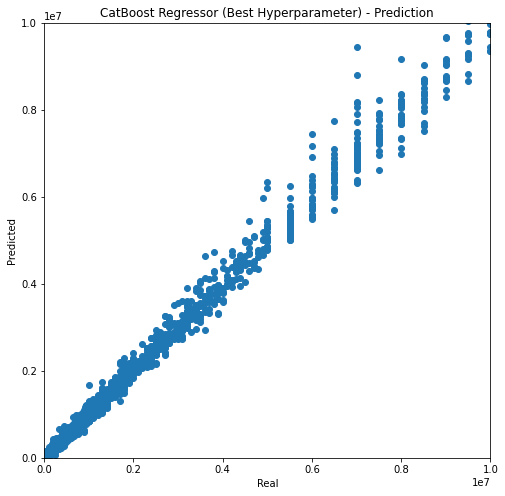

In [20]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor (Best Hyperparameter) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()

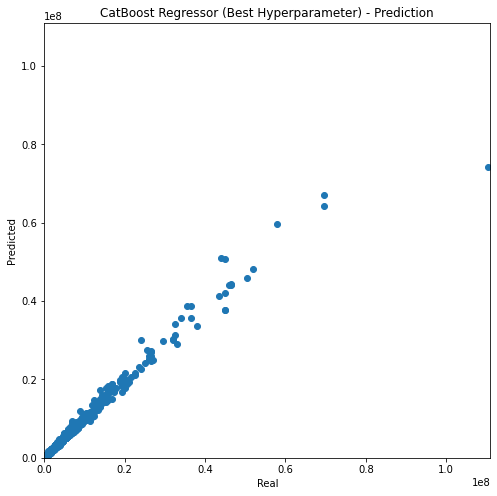

In [21]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor (Best Hyperparameter) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()

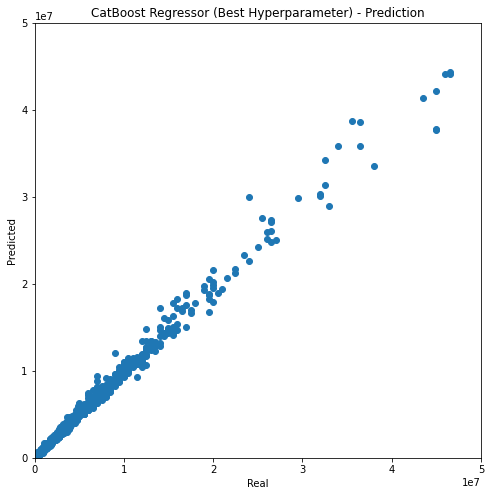

In [22]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor (Best Hyperparameter) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()